In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import scipy.stats as stats
import numpy as np

In [2]:
diabetes_data = pd.read_csv('diabetes_new.csv')
# show first 20 row 
diabetes_data.head(20)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [3]:
diabetes_data.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [4]:
diabetes_data['Diabetic'].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

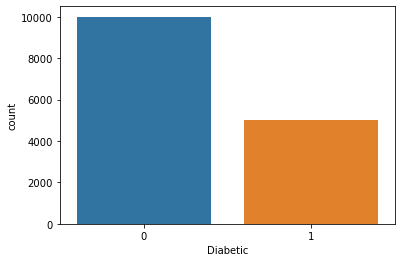

In [5]:
sns.countplot(diabetes_data['Diabetic'],label="count")

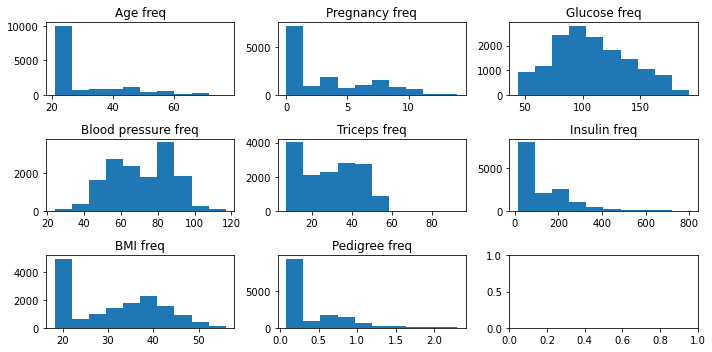

In [6]:

# plot histograms to reveal how the data is skewed

fig, axes = plt.subplots( nrows=3, ncols=3 )
( ageHist, pregHist, glucoseHist, bldPressHist, triThickHist
 , insulHist, bmiHist, pedigrHist, placeholder ) = axes.flatten()

fig.set_size_inches( 10, 5 )

ageHist.hist( diabetes_data[ "Age" ] )
ageHist.set_title( 'Age freq' )

pregHist.hist( diabetes_data[ "Pregnancies" ] )
pregHist.set_title( 'Pregnancy freq' )

glucoseHist.hist( diabetes_data[ "PlasmaGlucose" ] )
glucoseHist.set_title( 'Glucose freq' )

bldPressHist.hist( diabetes_data[ "DiastolicBloodPressure" ] )
bldPressHist.set_title( 'Blood pressure freq' )

triThickHist.hist( diabetes_data[ "TricepsThickness" ] )
triThickHist.set_title( 'Triceps freq' )

insulHist.hist( diabetes_data[ "SerumInsulin" ] )
insulHist.set_title( 'Insulin freq' )

bmiHist.hist( diabetes_data[ "BMI" ] )
bmiHist.set_title( 'BMI freq' )

pedigrHist.hist( diabetes_data[ "DiabetesPedigree" ] )
pedigrHist.set_title( 'Pedigree freq' )

plt.tight_layout()
plt.show()

In [7]:
diabetes_data = diabetes_data.assign( log_Age = lambda x: 
                                 np.log( x[ 'Age' ] ) )

diabetes_data = diabetes_data.assign( zscore_glucose = zscore( diabetes_data[ 'PlasmaGlucose' ] ) )
diabetes_data = diabetes_data.assign( zscore_pressure = zscore( diabetes_data[ 'DiastolicBloodPressure' ] ) )
diabetes_data = diabetes_data.assign( zscore_thick = zscore( diabetes_data[ 'TricepsThickness' ] ) )
diabetes_data = diabetes_data.assign( zscore_insulin = zscore( diabetes_data[ 'SerumInsulin' ] ) )
diabetes_data = diabetes_data.assign( zscore_bmi = zscore( diabetes_data[ 'BMI' ] ) )

# apply min-max for other features:  pregnancy, diabetes pedigree
scaler = MinMaxScaler()

minMaxData = pd.DataFrame( scaler.fit_transform( diabetes_data.loc[ :, [ 'Pregnancies','DiabetesPedigree' ] ] )
                         , columns = [ 'minMaxPreg', 'minMaxPedigree' ] )
diabetes_data = pd.concat( [ diabetes_data, minMaxData ], axis = 1, join = 'inner' )

diabetes_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,log_Age,zscore_glucose,zscore_pressure,zscore_thick,zscore_insulin,zscore_bmi,minMaxPreg,minMaxPedigree
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,3.044522,1.974401,0.523884,0.356298,-0.863136,1.229683,0.000000,0.510511
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,3.135494,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.571429,0.036123
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,3.135494,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.500000,0.000438
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,3.761200,-0.151868,0.404539,-0.262036,1.248633,-0.197512,0.642857,0.541848
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,3.091042,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.071429,0.212047


In [8]:
diabetes_copy = diabetes_data.copy(deep=True)
del diabetes_copy[ 'Age' ]
del diabetes_copy[ 'PlasmaGlucose' ]
del diabetes_copy[ 'DiastolicBloodPressure' ]
del diabetes_copy[ 'TricepsThickness' ]
del diabetes_copy[ 'SerumInsulin' ]
del diabetes_copy[ 'BMI' ]
del diabetes_copy[ 'DiabetesPedigree' ]
del diabetes_copy[ 'Pregnancies' ]
del diabetes_copy[ 'PatientID' ]

diabetes_copy.head()

,Diabetic,log_Age,zscore_glucose,zscore_pressure,zscore_thick,zscore_insulin,zscore_bmi,minMaxPreg,minMaxPedigree
0,0,3.044522,1.974401,0.523884,0.356298,-0.863136,1.229683,0.000000,0.510511
1,0,3.135494,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.571429,0.036123
2,0,3.135494,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.500000,0.000438
3,1,3.761200,-0.151868,0.404539,-0.262036,1.248633,-0.197512,0.642857,0.541848
4,0,3.091042,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.071429,0.212047


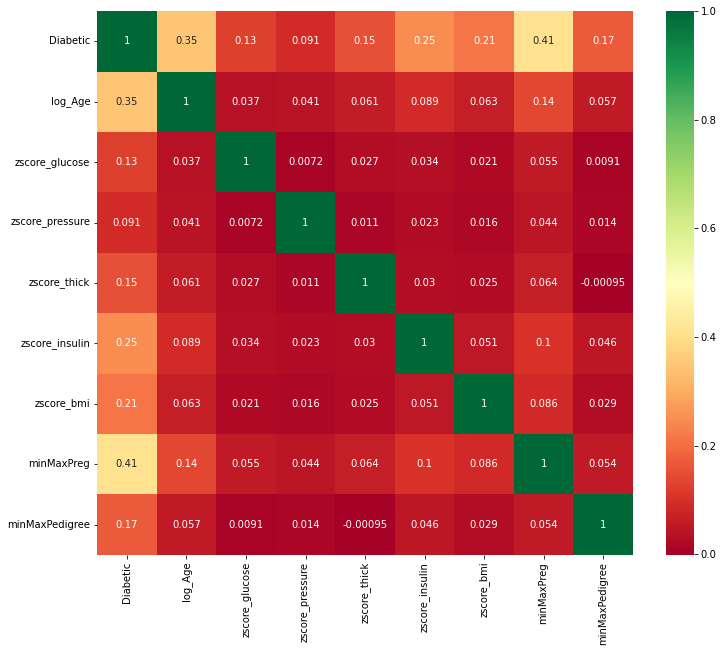

In [9]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn')

In [10]:
X = diabetes_copy.drop('Diabetic',axis='columns')
y = diabetes_copy.Diabetic

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=50)

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))
model_train_score = dtree.score(X_train, y_train)
model_test_score = dtree.score(X_test, y_test)
print(model_train_score)
print(model_test_score)

Accuracy Score = 90.0
1.0
0.9


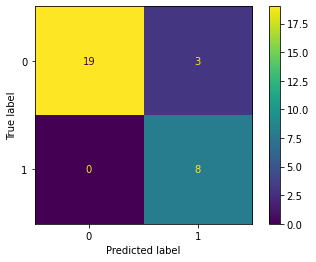

In [13]:
cm=confusion_matrix(y_test, predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= dtree.classes_)
disp.plot()

In [14]:
diabetes_copy.head(20)

,Diabetic,log_Age,zscore_glucose,zscore_pressure,zscore_thick,zscore_insulin,zscore_bmi,minMaxPreg,minMaxPedigree
0,0,3.044522,1.974401,0.523884,0.356298,-0.863136,1.229683,0.000000,0.510511
1,0,3.135494,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.571429,0.036123
2,0,3.135494,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.500000,0.000438
3,1,3.761200,-0.151868,0.404539,-0.262036,1.248633,-0.197512,0.642857,0.541848
4,0,3.091042,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.071429,0.212047
5,0,3.258097,-0.808509,1.239953,-1.361298,0.865358,-1.207693,0.000000,0.011414
6,0,3.044522,0.786192,-1.445306,-0.674259,0.669963,-0.980491,0.000000,0.043226
7,0,3.258097,-1.277539,0.941591,0.974632,-0.765438,-1.355914,0.000000,0.071112
8,1,3.970292,-0.871047,1.418971,0.287594,-0.855621,-0.500551,0.571429,0.164558
9,0,3.258097,-1.121196,-2.400065,0.768521,-0.720347,0.551297,0.071429,0.011648


In [15]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(dtree)
pickle.dump(saved_model, open("newmodel.pkl", "wb"))

# Then we will be loading that saved model
dtree_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
dtree_from_pickle.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [16]:
dtree.predict([[3.737670,-0.058062,-0.430875,-0.262036,-0.652710,-0.252603,0.214286,0.229878]])

array([1], dtype=int64)

In [17]:
dtree.predict([[3.737670,-0.058062,-0.430875,-0.262036,-0.652710,-0.252603,0.214286,0.229878]])

array([1], dtype=int64)

In [19]:
PlasmaGlucoseMEAN=diabetes_data['PlasmaGlucose'].mean()
PlasmaGlucoseSTD=diabetes_data['PlasmaGlucose'].std()

print(PlasmaGlucoseMEAN,PlasmaGlucoseSTD)

DiastolicBloodPressureMEAN=diabetes_data['DiastolicBloodPressure'].mean()
DiastolicBloodPressureSTD=diabetes_data['DiastolicBloodPressure'].std()

print(DiastolicBloodPressureMEAN,DiastolicBloodPressureSTD)

TricepsThicknessMEAN=diabetes_data['TricepsThickness'].mean()
TricepsThicknessSTD=diabetes_data['TricepsThickness'].std()

print(TricepsThicknessMEAN,TricepsThicknessSTD)

SerumInsulinMEAN=diabetes_data['SerumInsulin'].mean()
SerumInsulinSTD=diabetes_data['SerumInsulin'].std()

print(SerumInsulinMEAN,SerumInsulinSTD)


BMIMEAN=diabetes_data['BMI'].mean()
BMISTD=diabetes_data['BMI'].std()

print(BMIMEAN,BMISTD)
print("okkkkk")


Age =43
PlasmaGlucose = 102
DiastolicBloodPressure=100
TricepsThickness = 25 
SerumInsulin = 289
BMI=  42.185720
Pregnancies=3 
DiabetesPedigree =0.175593


# calculating zscore

PlasmaGlucosezscore=(PlasmaGlucose-PlasmaGlucoseMEAN)/PlasmaGlucoseSTD

print(PlasmaGlucosezscore)


DiastolicBloodPressurezscore=(DiastolicBloodPressure-DiastolicBloodPressureMEAN)/DiastolicBloodPressureSTD

print(DiastolicBloodPressurezscore)


TricepsThicknesszscore=(TricepsThickness-TricepsThicknessMEAN)/TricepsThicknessSTD

print(TricepsThicknesszscore)

SerumInsulinzscore=(SerumInsulin-SerumInsulinMEAN)/SerumInsulinSTD

print(SerumInsulinzscore)


BMIzscore=(BMI-BMIMEAN)/BMISTD

print(BMIzscore)


# calculating minmaxscaller
PregnanciesMIN=diabetes_data['Pregnancies'].min()
PregnanciesMAX=diabetes_data['Pregnancies'].max()

print("PregnanciesMIN = " , PregnanciesMIN)
print("PregnanciesMAX = " , PregnanciesMAX)


Pregnancies_scalled=(Pregnancies-PregnanciesMIN)/(PregnanciesMAX-PregnanciesMIN)

print(Pregnancies_scalled)



DiabetesPedigreeMIN=diabetes_data['DiabetesPedigree'].min()
DiabetesPedigreeMAX=diabetes_data['DiabetesPedigree'].max()

print("DiabetesPedigreeMIN = " , DiabetesPedigreeMIN)
print("DiabetesPedigreeMAX = " , DiabetesPedigreeMAX)


DiabetesPedigree_scalled=(DiabetesPedigree-DiabetesPedigreeMIN)/(DiabetesPedigreeMAX-DiabetesPedigreeMIN)

print(DiabetesPedigree_scalled)

# get age log
age = np.log(Age)
print(age)

userDF= pd.DataFrame([age , PlasmaGlucosezscore , DiastolicBloodPressurezscore , TricepsThicknesszscore , SerumInsulinzscore ,
                     
                  BMIzscore , Pregnancies_scalled , DiabetesPedigree_scalled   ])

print(userDF)


dtree.predict([[age , PlasmaGlucosezscore , DiastolicBloodPressurezscore , TricepsThicknesszscore , SerumInsulinzscore ,
                     BMIzscore , Pregnancies_scalled , DiabetesPedigree_scalled ]])


107.85686666666666 31.98197465181089
71.22066666666667 16.758716036531574
28.814 14.555715781922968
137.85213333333334 133.06825195901257
31.509646041017334 9.758999734051898
okkkkk
-0.18313023915598134
1.7172755520529466
-0.262027649972163
1.1358672293465082
1.0939721539012695
PregnanciesMIN =  0
PregnanciesMAX =  14
0.21428571428571427
DiabetesPedigreeMIN =  0.078043795
DiabetesPedigreeMAX =  2.301594189
0.04387092159603198
3.7612001156935624
          0
0  3.761200
1 -0.183130
2  1.717276
3 -0.262028
4  1.135867
5  1.093972
6  0.214286
7  0.043871


array([1], dtype=int64)